In [1]:
!pip install dlib
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

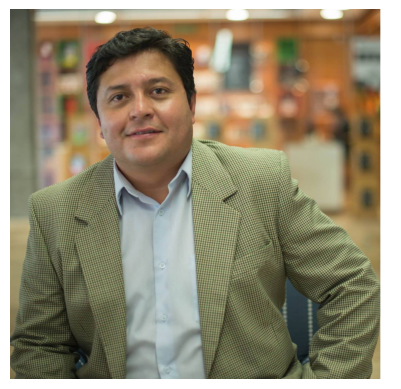

rostros/foto.png


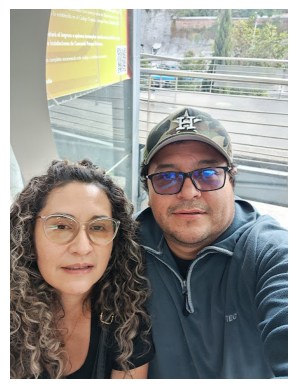

rostros/foto1.jpg


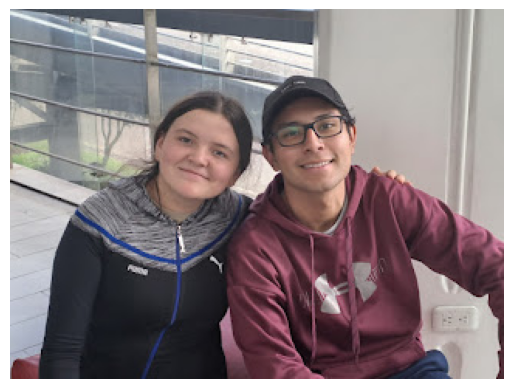

rostros/foto2.jpg


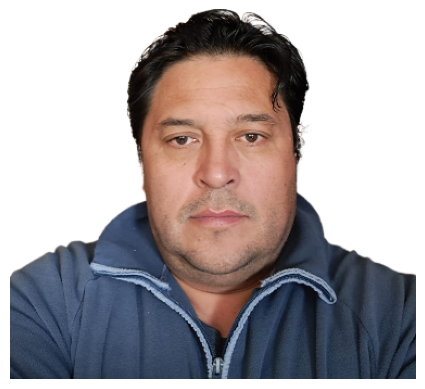

rostros/fotoBlanco.png


In [4]:
import dlib

# Load the pre-trained face detector
face_detector = dlib.get_frontal_face_detector()

# Load the image and detect faces
fotos = [
    "foto.png",
    "foto1.jpg",
    "foto2.jpg",
    "fotoBlanco.png"
]

# Imprimir las rutas de archivos
for foto in fotos:
    
    image = 'rostros/'+foto  # Reemplaza con la ruta de tu imagen

    # Cargar la imagen usando matplotlib
    image = mpimg.imread(image)

    # Mostrar la imagen usando matplotlib
    plt.imshow(image)
    plt.axis('off')  # Deshabilitar los ejes para una visualización limpia
    plt.show()
    
    image = dlib.load_rgb_image('rostros/'+foto)
    print ('rostros/'+foto)
    faces = face_detector(image)

    # Iterate over the detected faces
    
    for face in faces:
    
        # Process each face
        # Extract the bounding box coordinates of the face
        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        # Draw a rectangle around the face on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the image with detected faces
        cv2.imshow("Face Detection", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Descargar el modelo pre-entrenado MobileNetV2 sin las capas densas
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Agregar capas personalizadas para las nuevas clases
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Cargar y preprocesar los datos de entrenamiento
X_train, y_train = cargar_datos_entrenamiento()
X_train = preprocess_input(X_train)
y_train = to_categorical(y_train, num_classes=3)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el rendimiento del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

# Cargar una imagen de prueba y realizar la predicción
imagen_prueba = image.load_img('imagen_prueba.jpg', target_size=(224, 224))
imagen_prueba = image.img_to_array(imagen_prueba)
imagen_prueba = preprocess_input(imagen_prueba)
imagen_prueba = np.expand_dims(imagen_prueba, axis=0)

predictions = model.predict(imagen_prueba)
clases = ['Silla', 'Mesa', 'Lámpara']
resultado = clases[np.argmax(predictions)]

print(f'La imagen es: {resultado}')

ModuleNotFoundError: No module named 'tensorflow'